# SoS Notebooks
For this notebook, we are using SoS (Script of Scripts) just to have the option of switching between python and MATLAB toolboxes if needed. This might be unnecessary for an implementation using only one language (python or MATLAB).

## SoS Setup
COGS 189 has an example repo on how to setup SoS:

https://github.com/ollie-d/sos_matlab_python_examples

## More EEG Resources
COGS 189 also has some examples of EEG processing pipelines that could be useful:

https://github.com/desa-lab/cogs189wi23

# Downloading the dataset
In this notebook, we'll be working with the following music imagery dataset:

https://datadryad.org/stash/dataset/doi:10.5061/dryad.dbrv15f0j

This dataset forms the basis of the following studies:

- Di Liberto, G. M., Marion, G., & Shamma, S. A. (2021). Accurate Decoding of Imagined and Heard Melodies. Frontiers in Neuroscience, 15. https://www.frontiersin.org/articles/10.3389/fnins.2021.673401
- Liberto, G. M. D., Marion, G., & Shamma, S. A. (2021). The Music of Silence: Part II: Music Listening Induces Imagery Responses. Journal of Neuroscience, 41(35), 7449–7460. https://doi.org/10.1523/JNEUROSCI.0184-21.2021
- Marion, G., Liberto, G. M. D., & Shamma, S. A. (2021). The Music of Silence: Part I: Responses to Musical Imagery Encode Melodic Expectations and Acoustics. Journal of Neuroscience, 41(35), 7435–7448. https://doi.org/10.1523/JNEUROSCI.0183-21.2021

The dataset itself consists of 
- ImageryData.mat (1.50 GB)
- original_stim.zip (14.04 MB)
- README.txt (1.05 kB)

The mat file could take some time to download...

First we make a data directory within our repo (not uploaded to github given the dataset's size):

In [1]:
!mkdir data
!wget https://datadryad.org/stash/downloads/file_stream/861413 -O data/ImageryData.mat -nc
!wget https://datadryad.org/stash/downloads/file_stream/861412 -O data/original_stim.zip -nc
!wget https://datadryad.org/stash/downloads/file_stream/861411 -O data/README.txt -nc

/opt/conda/lib/python3.9/site-packages/sos_notebook/kernel.py:1334: DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  msg['msg_id'] = self._parent_header['header']['msg_id']


mkdir: cannot create directory ‘data’: File exists
File ‘data/ImageryData.mat’ already there; not retrieving.
File ‘data/original_stim.zip’ already there; not retrieving.
File ‘data/README.txt’ already there; not retrieving.


In [ ]:
! unzip data/original_stim.zip -d data/original_stim

Now we download the three files in the dataset (only if the files haven't already been downloaded)

# Setup

In [2]:
from scipy.io import loadmat
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html

import matplotlib.pyplot as plt

# Exploring the dataset

Documentation from dryad:
> ### Usage notes
>
> The unique data file contains 3 variables:     
>    - downFs: the sampling rate
>    - eeg: the EEG data as a cell-array (21\*2\*44\*(1803\*64)) -> (participants\*conditions\*trials\*(time\*electrodes)),  with conditions as (listening, imagery)
>    - stim: the time-representation of the expectation signal (onsets can be extracted from it) following the exact  same structure as the EEG ((21\*2\*44\*(1803\*1)))
> 
> We also include a folder original_stim containing the audio presented during the experiment (left channel is the metronome), the midi files, and the pdf scores.

In [3]:
# MATLAB vectors seem to get read-in as 1xDim arrays, which makes indexing annoying
# squeeze_me parameter resolves this by squeezing out length 1 dimensions

ImageryData = loadmat(r"data/ImageryData.mat", squeeze_me=True) 
print(ImageryData.keys())

dict_keys(['__header__', '__version__', '__globals__', 'downFs', 'eeg', 'stim'])


In [4]:
# Grab the three variables in the dataset
downFs = ImageryData['downFs']
eeg = ImageryData['eeg']
stim = ImageryData['stim']

In [5]:
# Verify that squeeze worked (expecting an N-array, not a 1xN array)
print(eeg.shape)

(21,)


In [6]:
pid = 0 # participant (21)
print(f'subject: {pid}\tshape:', eeg[pid].shape)

subject: 0	shape: (2,)


In [7]:
cid = 0 # condition (2: listening, imagery)
print(f'condition: {pid}\tshape:', eeg[pid][cid].shape)

condition: 0	shape: (44,)


In [8]:
tid = 0 # trial (44)
print(f'trial: {pid}\tshape:', eeg[pid][cid][tid].shape)

trial: 0	shape: (1803, 64)


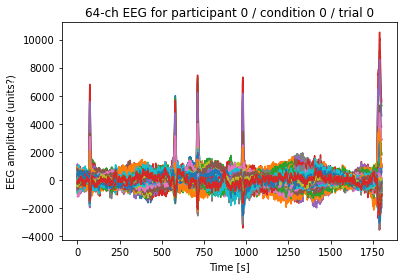

In [9]:
data = eeg[pid][cid][tid]
plt.plot(data)
plt.xlabel('Time [s]')
plt.ylabel('EEG amplitude (units?)')
plt.title(f'{data.shape[1]}-ch EEG for participant {pid} / condition {cid} / trial {tid}')
plt.show()

(44,)
<class 'numpy.ndarray'>


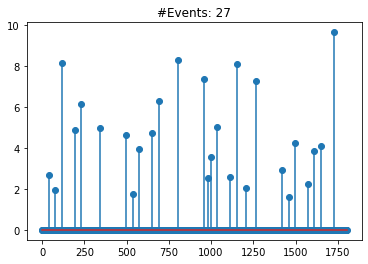

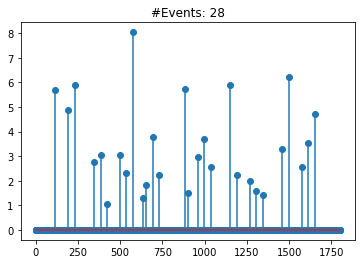

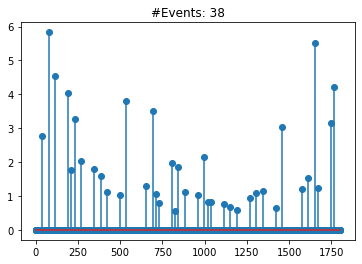

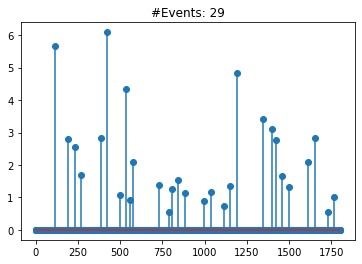

In [33]:
print(stim[pid][cid].shape)
print(type(stim[pid][cid]))
import numpy as np

stim_set = []
for trial_stim in stim[pid][cid]:
    trial_stim = list(trial_stim) # easier to find duplicates than with ndarray

    if not (trial_stim in stim_set): 
        stim_set.append(trial_stim)
        
for trial_stim in stim_set:
    plt.figure()
    plt.stem(trial_stim)
    notes = [x for x in  trial_stim if x > 0]
    plt.title(f'#Events: {len(notes)}')

# mTRF toolbox
MATLAB:
https://github.com/mickcrosse/mTRF-Toolbox

Python translation:
https://github.com/SRSteinkamp/pymtrf

# MNE
https://mne.tools/dev/auto_examples/decoding/receptive_field_mtrf.html